<h1> The Challenge:</h1>

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

In [302]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# feel free to import other libraries! 

In [303]:
df = pd.read_csv('states_edu.csv')

Chosen test: Math 8th grade

<h2> Cleanup (optional)</h2>

_Use this space to rename columns, deal with missing data, etc._

In [304]:
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


<h2> Feature Selection </h2>

_Use this space to modify or create features_

In [305]:
df = df.dropna()
df = df.drop(["AVG_MATH_4_SCORE","AVG_READING_4_SCORE", "AVG_READING_8_SCORE", "GRADES_4_G", "GRADES_12_G", "GRADES_9_12_G", "GRADES_PK_G", "GRADES_KG_G"], axis=1)
df["fed%"] = df["FEDERAL_REVENUE"] / df["TOTAL_REVENUE"]
df["state%"] = df["STATE_REVENUE"] / df["TOTAL_REVENUE"]
df["local%"] = df["LOCAL_REVENUE"] / df["TOTAL_REVENUE"]
df.head()
df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_8_G', 'GRADES_1_8_G',
       'GRADES_ALL_G', 'AVG_MATH_8_SCORE', 'fed%', 'state%', 'local%'],
      dtype='object')

Final feature list: ['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_8_G', 'GRADES_1_8_G',
       'GRADES_ALL_G', 'AVG_MATH_8_SCORE', 'fed%', 'state%', 'local%']

Feature selection justification: Did not want to get rid of any of the expenditures or overall eighth grade data in case they are relevant later. Created features to see the percentage of federal state and local revenue so that I can see if one of those proves to be more important than the other

<h2> EDA </h2>

Visualization 1

Text(0.5, 1.0, 'Revenue vs Math Scores')

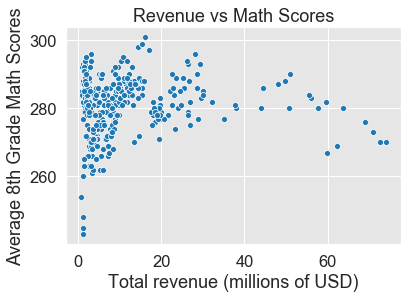

In [306]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.dark_palette(color="#326fa8")
sns.scatterplot(df["TOTAL_REVENUE"] / 1000000, df["AVG_MATH_8_SCORE"])
plt.xlabel("Total revenue (millions of USD)")
plt.ylabel("Average 8th Grade Math Scores")
plt.title("Revenue vs Math Scores") 

Total Revenue vs Average Math Scores of 8th Graders

Visualization 2

Text(0.5, 0, 'Average Math Scores of 8th Graders')

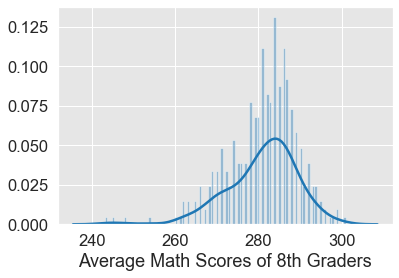

In [307]:
sns.distplot(df["AVG_MATH_8_SCORE"], bins=100)
plt.xlabel("Average Math Scores of 8th Graders")

Average Math Scores of 8th Graders

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [308]:
from sklearn.model_selection import train_test_split

In [309]:
#looking to see how funding impacts math outcomes
X = df[["fed%", "state%", "local%"]].dropna()
y = df["AVG_MATH_8_SCORE"].dropna()

In [310]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.3, random_state=0)

<h2> Prediction </h2>

Chosen ML task: Ordinary Least Squares Regression

In [311]:
# import your sklearn class here
from sklearn import linear_model

In [312]:
# create your model here
#chose Bayesian regression because I have always thought Bayes Theorem is super interesting
#and I want to learn more about Bayesian inference and stuff
model = linear_model.BayesianRidge()

In [313]:
model.fit(X_train, y_train)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

In [314]:
y_pred = model.predict(X_test)

In [315]:
# for classification:
#from sklearn.metrics import plot_confusion_matrix

#plot_confusion_matrix(model, X_test, y_test,
#                         cmap=plt.cm.Blues)

<h2> Summary </h2>

Text(0, 0.5, 'Average 8th Grader Math Scores')

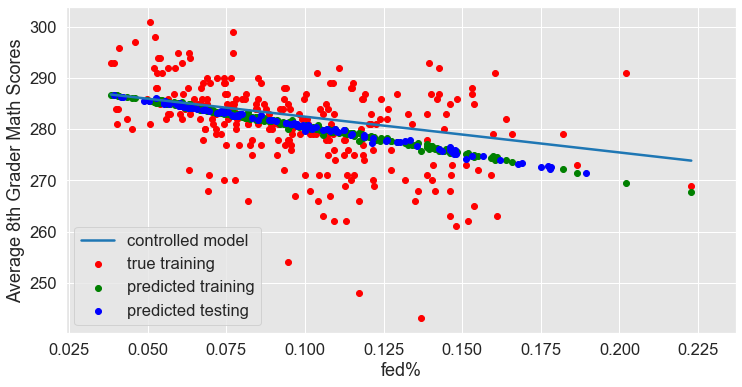

In [316]:
# for regression: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.


col_name = "fed%"
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel("Average 8th Grader Math Scores")

In [317]:
#giving me a summary of the models fit and parameters
print(model.score(X_test, y_test))
print(np.mean(model.predict(X_test)-y_test))
print(np.mean(np.abs(model.predict(X_test)-y_test)))
print(np.mean((model.predict(X_test)-y_test)**2)**0.5)
print(model.intercept_)
print(model.coef_)

0.1208516039737042
-0.7631715484355873
5.859722381661632
7.705036540306973
255.96611568480728
[-70.09818402  36.06358139  34.03460263]


I used Bayesian regression to see how the ratio of federal, state, and local funding influences the test scores of eighth grade math students. The model shows that a high ratio of federal funding generally leads to lower test scores. This seems logical because the schools that receive the highest percentage of federal funding with respect to their total funding are typically schools underperforming schools, hence the federal government gives them aid. Therefore schools receiving large amounts of federal funding will generally already have poor test scores. State and local funding on the other hand increases test scores which makes sense because schools are funded by local and state taxes, so if that funding is high, the schools are likely in higher income areas, meaning the students are more likely to succeed in standardized tests. However, with regards to the r^2 metric, the model doesn't seem to be a super great fit. Paradoxically, though, the errors don't look too big to me, so that would indicate a good fit. I am not sure how to make sense of this, but I hope I learn this semester on a cool project!